## Observations and Insights 

- From the Box Plots we can see the effectiveness of Capomulin and Ramicane is far greater than the effectiveness of Infubinol and Ceftamin.

- The effectiveness of Capomulin is very similar to Ramicane and the effectiveness off Infubinol is very similar to Ceftamine.

- Our Scatter Plot shows us that on the treatment 'Capomulin' the heaver the mouse the efficacy of the treament is significantly reduced.

- Our study on Mouse 'w914' shows that the volume of the tumor decreased as days passed over the couse off the study. Showing in this case the treatment of 'Capomulin' was sucusseful.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = 'Data/Mouse_metadata.csv'
study_results_path = 'Data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Merged_DF = pd.merge(mouse_metadata, study_results, how= 'outer', on= 'Mouse ID')

# Display the data table for preview

Merged_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

Merged_DF['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Index_DF = Merged_DF.set_index('Mouse ID')

Index_DF

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

Index_DF.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Cleaned_DF = Index_DF.drop(['g989'])

In [6]:
# Checking the number of mice in the clean DataFrame.

Cleaned_DF = Cleaned_DF.reset_index()

Cleaned_DF['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Tumor_Volume_DF = Cleaned_DF.groupby(['Drug Regimen'])

Tumor_Mean = Tumor_Volume_DF['Tumor Volume (mm3)'].mean()
Tumor_Median = Tumor_Volume_DF['Tumor Volume (mm3)'].median()
Tumor_Variance = Tumor_Volume_DF['Tumor Volume (mm3)'].var()
Tumor_Standard_Deviation = Tumor_Volume_DF['Tumor Volume (mm3)'].std()
Tumor_SEM = Tumor_Volume_DF['Tumor Volume (mm3)'].sem()


Tumor_Volume_DF = pd.DataFrame({'Mean': Tumor_Mean,
                                'Median' : Tumor_Median,
                                'Variance' : Tumor_Variance,
                                'Standard Deviation' : Tumor_Standard_Deviation,
                                'SEM' : Tumor_SEM})


Tumor_Volume_DF = Tumor_Volume_DF.reset_index()

Tumor_Volume_DF

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

Tumor_Volume_DF_V2 = Cleaned_DF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor_Volume_DF_V2 = Tumor_Volume_DF_V2.rename(columns={'mean': 'Mean',
                                                        'median': 'Median',
                                                        'var': 'Variance',
                                                        'std': 'Standard Deviation',
                                                        'sem': 'SEM'})

Tumor_VolumeV2_DF_V2 = Tumor_Volume_DF_V2.reset_index()

Tumor_Volume_DF_V2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

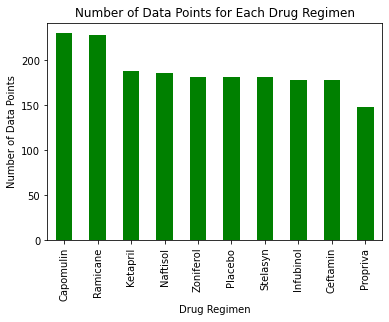

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Bar_Graph = Cleaned_DF['Drug Regimen'].value_counts().plot.bar(facecolor='green')

Bar_Graph.set_xlabel('Drug Regimen')
Bar_Graph.set_ylabel('Number of Data Points')
Bar_Graph.set_title('Number of Data Points for Each Drug Regimen')

plt.show()

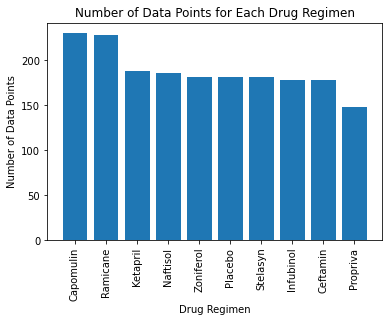

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

y_axis = Cleaned_DF['Drug Regimen'].value_counts()
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values , rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Drug Regimen')

plt.show()

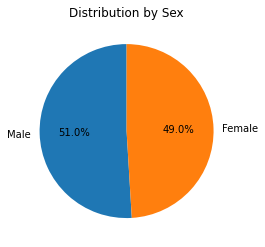

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Gender_Data = Cleaned_DF['Sex'].value_counts()

Pie_Plot = Gender_Data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')
Pie_Plot.set_ylabel('')

plt.show()

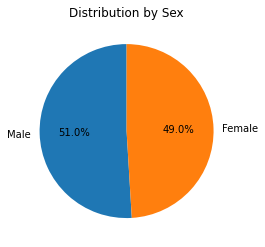

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender_Data = Cleaned_DF['Sex'].value_counts()

plt.pie(Gender_Data, labels=Gender_Data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Max_Timepoint_DF = pd.DataFrame(Cleaned_DF.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns=
                {'Timepoint': 'Max Timepoint'})

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Last_Timepoint_DF = pd.merge(Cleaned_DF, Max_Timepoint_DF, on='Mouse ID')

Last_Timepoint_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds


Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Treatment_Values = []
   

for Treatment in Treatments:    

    Treatments_DF = Last_Timepoint_DF.loc[Last_Timepoint_DF['Drug Regimen'] == Treatment]
    Final_Volume_DF = Treatments_DF.loc[Treatments_DF['Timepoint'] == Treatments_DF['Max Timepoint']]
    
    Values = Final_Volume_DF['Tumor Volume (mm3)']
    Treatment_Values.append(Values)
    
    Quartiles = Values.quantile([.25,.5,.75])
    Lower_Quartile = Quartiles[0.25]
    Upper_Quartile = Quartiles[0.75]
    IQR = Upper_Quartile - Lower_Quartile
    print(f'IQR for {Treatment}: {IQR}')
    
    Lower_Bound = Lower_Quartile - (1.5 * IQR)
    Upper_Bound = Upper_Quartile + (1.5 * IQR)
    print(f'Lower Bound for {Treatment}: {Lower_Bound}')
    print(f'Upper Bound for {Treatment}: {Upper_Bound}')
    
    Outliers_Count = (Values.loc[(Final_Volume_DF['Tumor Volume (mm3)'] >= Upper_Bound) | 
                                        (Final_Volume_DF['Tumor Volume (mm3)'] <= Lower_Bound)]).count()
    print(f'Number of {Treatment} outliers: {Outliers_Count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


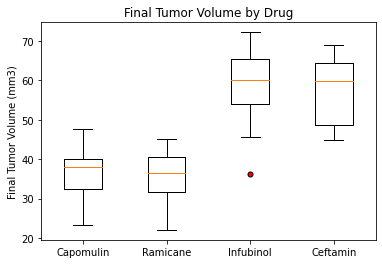

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Markers = dict(marker='o', markerfacecolor='r', markersize=5, markeredgecolor='black')

plt.boxplot(Treatment_Values, flierprops= Markers)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

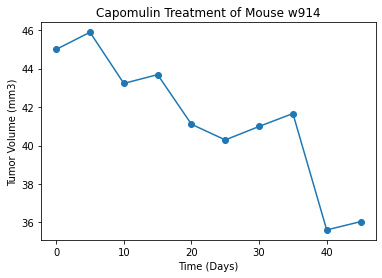

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Mouse = Cleaned_DF.loc[Cleaned_DF['Mouse ID'] == 'w914']

plt.plot(Mouse['Timepoint'], Mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse w914')

plt.show()

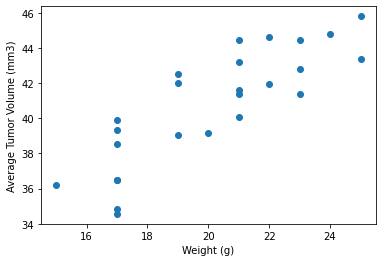

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_DF = Cleaned_DF.loc[Cleaned_DF['Drug Regimen'] == 'Capomulin']
Capomulin_Average = Capomulin_DF.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_Average['Weight (g)'],Capomulin_Average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84


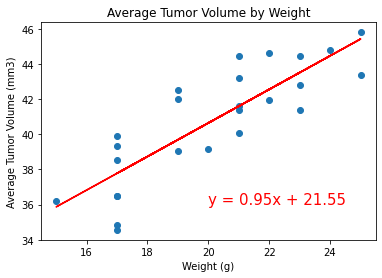

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_value = Capomulin_Average['Weight (g)']
y_value = Capomulin_Average['Tumor Volume (mm3)']
correlation = st.pearsonr(x_value, y_value)


print(f'''The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}''')


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(20,36),fontsize=15,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

plt.show()